In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from scikeras.wrappers import KerasClassifier# this is the scikeras wrapper for Keras models to use with scikit-learn


In [2]:
## Load the MNIST dataset
(train_images, train_Labels), (test_images, test_Labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
#normalizing the data
train_images = train_images / 255
test_images = test_images / 255



In [5]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

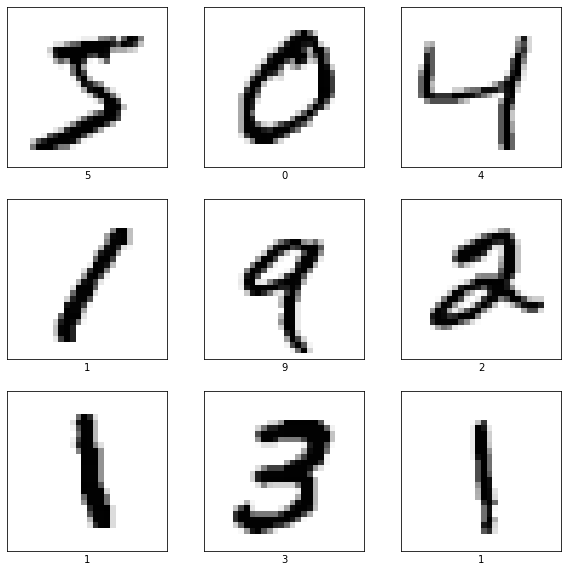

In [10]:
#visualizing the data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_Labels[i]])

In [6]:
#making the model 
num_filters = 8
filter_size = 3
pool_size = 2
model = Sequential([
    Conv2D(num_filters, filter_size, activation='relu', input_shape=(28, 28, 1)), #input layer
    MaxPooling2D(pool_size), #pooling layer
    Flatten(), #flattening layer
    Dense(128, activation='relu'), #hidden layer
    Dropout(0.2), #dropout layer
    Dense(10, activation='softmax') #output layer
])


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 128)               173184    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [7]:
#compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#history = model.fit(train_images,train_Labels, epochs=10, validation_data=(test_images, test_Labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0418 - val_accuracy: 0.9886
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0543 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0112 - accuracy: 0.9959 - val_loss: 0.0414 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0501 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0505 - val_accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0454 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0502 - val_acc

In [8]:
history = KerasClassifier(model, epochs=10,batch_size=28 , verbose=1)
#batchsize is the number of samples per gradient update, 28 is the number of samples in each batch
#verbos =1 means that the model will print the progress of the training
history = history.fit(train_images, train_Labels)


Epoch 1/10
2143/2143 [==============================] - 21s 9ms/step - loss: 0.2170 - accuracy: 0.9355
Epoch 2/10
2143/2143 [==============================] - 20s 9ms/step - loss: 0.0830 - accuracy: 0.9751
Epoch 3/10
2143/2143 [==============================] - 23s 11ms/step - loss: 0.0572 - accuracy: 0.9825
Epoch 4/10
2143/2143 [==============================] - 23s 11ms/step - loss: 0.0427 - accuracy: 0.9864
Epoch 5/10
2143/2143 [==============================] - 18s 9ms/step - loss: 0.0359 - accuracy: 0.9883
Epoch 6/10
2143/2143 [==============================] - 18s 8ms/step - loss: 0.0274 - accuracy: 0.9911
Epoch 7/10
2143/2143 [==============================] - 14s 7ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 8/10
2143/2143 [==============================] - 15s 7ms/step - loss: 0.0202 - accuracy: 0.9933
Epoch 9/10
2143/2143 [==============================] - 24s 11ms/step - loss: 0.0169 - accuracy: 0.9945
Epoch 10/10
2143/2143 [==============================] - 20s 9ms/step 

313/313 - 1s - loss: 0.0516 - accuracy: 0.9878 - 548ms/epoch - 2ms/step

Test accuracy: 0.9878000020980835


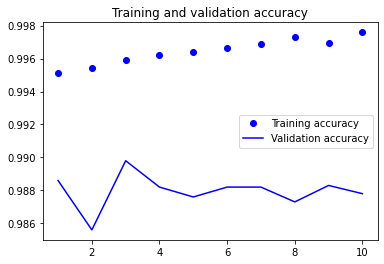

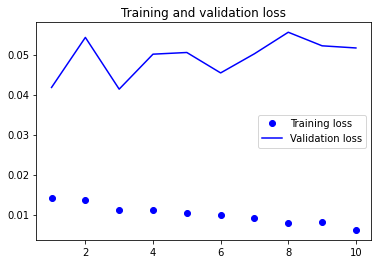

In [19]:
#evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_Labels, verbose=2)
print('\nTest accuracy:', test_acc)
#plotting the accuracy and loss of the model
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') #'bo' is the color of the line
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [20]:
model.save('ocr.h5')

C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
#load the model
model = tf.keras.models.load_model('ocr.h5')

In [10]:
from sklearn.model_selection import cross_val_predict, cross_val_score
#cross validation
scores = cross_val_score(history, train_images, train_Labels, cv=3, scoring='accuracy')
print("Cross-validation scores:", scores)

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmpessc22pn\assets


INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmpessc22pn\assets


Epoch 1/10
1429/1429 [==============================] - 14s 10ms/step - loss: 0.0127 - accuracy: 0.9960
Epoch 2/10
1429/1429 [==============================] - 15s 10ms/step - loss: 0.0111 - accuracy: 0.9961
Epoch 3/10
1429/1429 [==============================] - 17s 12ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 4/10
1429/1429 [==============================] - 24s 17ms/step - loss: 0.0086 - accuracy: 0.9970
Epoch 5/10
1429/1429 [==============================] - 21s 15ms/step - loss: 0.0081 - accuracy: 0.9970
Epoch 6/10
1429/1429 [==============================] - 14s 10ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 7/10
1429/1429 [==============================] - 14s 10ms/step - loss: 0.0058 - accuracy: 0.9980
Epoch 8/10
1429/1429 [==============================] - 14s 10ms/step - loss: 0.0081 - accuracy: 0.9973
Epoch 9/10
1429/1429 [==============================] - 15s 11ms/step - loss: 0.0075 - accuracy: 0.9973
Epoch 10/10
715/715 [==============================] - 3s 4ms/st

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp1k6yeodw\assets


Epoch 1/10
1429/1429 [==============================] - 20s 13ms/step - loss: 0.0106 - accuracy: 0.9968
Epoch 2/10
1429/1429 [==============================] - 23s 16ms/step - loss: 0.0117 - accuracy: 0.9957
Epoch 3/10
1429/1429 [==============================] - 15s 11ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 4/10
1429/1429 [==============================] - 15s 10ms/step - loss: 0.0085 - accuracy: 0.9968
Epoch 5/10
1429/1429 [==============================] - 15s 10ms/step - loss: 0.0081 - accuracy: 0.9970
Epoch 6/10
1429/1429 [==============================] - 20s 14ms/step - loss: 0.0072 - accuracy: 0.9975
Epoch 7/10
1429/1429 [==============================] - 22s 16ms/step - loss: 0.0077 - accuracy: 0.9973
Epoch 8/10
1429/1429 [==============================] - 19s 13ms/step - loss: 0.0066 - accuracy: 0.9978
Epoch 9/10
1429/1429 [==============================] - 18s 12ms/step - loss: 0.0061 - accuracy: 0.9981
Epoch 10/10
715/715 [==============================] - 4s 5ms/st

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp2ueqahk2\assets


Epoch 1/10
1429/1429 [==============================] - 10s 7ms/step - loss: 0.0118 - accuracy: 0.9956
Epoch 2/10
1429/1429 [==============================] - 11s 7ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 3/10
1429/1429 [==============================] - 21s 15ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 4/10
1429/1429 [==============================] - 21s 15ms/step - loss: 0.0085 - accuracy: 0.9969
Epoch 5/10
1429/1429 [==============================] - 14s 10ms/step - loss: 0.0080 - accuracy: 0.9972
Epoch 6/10
1429/1429 [==============================] - 16s 11ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 7/10
1429/1429 [==============================] - 16s 11ms/step - loss: 0.0089 - accuracy: 0.9967
Epoch 8/10
1429/1429 [==============================] - 15s 10ms/step - loss: 0.0064 - accuracy: 0.9976
Epoch 9/10
1429/1429 [==============================] - 20s 14ms/step - loss: 0.0056 - accuracy: 0.9982
Epoch 10/10
715/715 [==============================] - 3s 3ms/step

In [11]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_images, train_Labels)
print(any(dummy_clf.predict(test_images) == test_Labels)) #any means if any of the predictions are correct

crossvaldummy = cross_val_score(dummy_clf, train_images, train_Labels, cv=5, scoring='accuracy')
print("cross val score for dummy classifier: ",crossvaldummy.mean())

True
cross val score for dummy classifier:  0.11236666666666666


INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp4qqxl5gn\assets


INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmp4qqxl5gn\assets


Epoch 1/10
1429/1429 [==============================] - 6s 4ms/step - loss: 0.0132 - accuracy: 0.9954
Epoch 2/10
1429/1429 [==============================] - 6s 4ms/step - loss: 0.0108 - accuracy: 0.9964
Epoch 3/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0097 - accuracy: 0.9967
Epoch 4/10
1429/1429 [==============================] - 6s 4ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 5/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0083 - accuracy: 0.9970
Epoch 6/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 7/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0071 - accuracy: 0.9975
Epoch 8/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0066 - accuracy: 0.9977
Epoch 9/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0068 - accuracy: 0.9978
Epoch 10/10
715/715 [==============================] - 1s 1ms/step
INFO:tensorflow

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmpcnpwgpei\assets


Epoch 1/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0127 - accuracy: 0.9962
Epoch 2/10
1429/1429 [==============================] - 6s 4ms/step - loss: 0.0112 - accuracy: 0.9961
Epoch 3/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 4/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0086 - accuracy: 0.9972
Epoch 5/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0081 - accuracy: 0.9976
Epoch 6/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0079 - accuracy: 0.9972
Epoch 7/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0060 - accuracy: 0.9977
Epoch 8/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0072 - accuracy: 0.9973
Epoch 9/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 10/10
715/715 [==============================] - 1s 2ms/step
INFO:tensorflow

INFO:tensorflow:Assets written to: C:\Users\USer\AppData\Local\Temp\tmpbycs7u7p\assets


Epoch 1/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 2/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0106 - accuracy: 0.9962
Epoch 3/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0086 - accuracy: 0.9974
Epoch 4/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0087 - accuracy: 0.9970
Epoch 5/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0081 - accuracy: 0.9973
Epoch 6/10
1429/1429 [==============================] - 14s 9ms/step - loss: 0.0074 - accuracy: 0.9974
Epoch 7/10
1429/1429 [==============================] - 9s 7ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 8/10
1429/1429 [==============================] - 5s 4ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 9/10
1429/1429 [==============================] - 6s 4ms/step - loss: 0.0059 - accuracy: 0.9980
Epoch 10/10
715/715 [==============================] - 5s 6ms/step
[[5914    0   

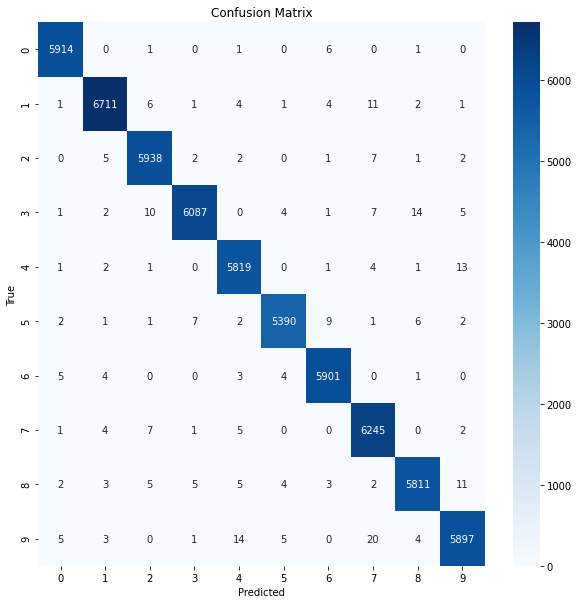

In [12]:
y_train_pred = cross_val_predict(history, train_images, train_Labels, cv=3)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cf = confusion_matrix(train_Labels, y_train_pred)
print(cf)
plt.figure(figsize=(10, 10))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(train_Labels, y_train_pred, average='weighted')
recall = recall_score(train_Labels, y_train_pred, average='weighted')
f1 = f1_score(train_Labels, y_train_pred, average='weighted')
print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Precision: 0.9952195086127701, Recall: 0.9952166666666666, F1 Score: 0.9952162042680706


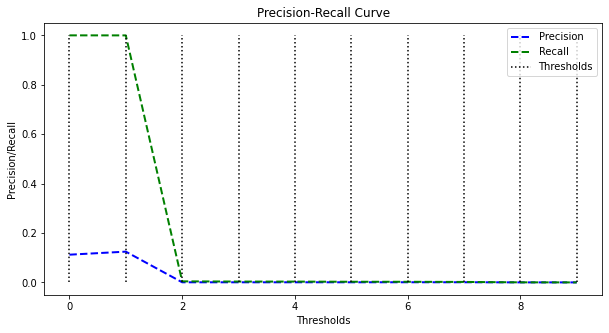

In [15]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(train_Labels, y_train_pred, pos_label=1)
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precision[:-1],"b--" ,label='Precision', linewidth=2)
plt.plot(thresholds, recall[:-1], "g--", label='Recall', linewidth=2)
plt.vlines(thresholds, 0, 1,"k" ,linestyles='dotted', label='Thresholds')
plt.xlabel('Thresholds')
plt.ylabel('Precision/Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

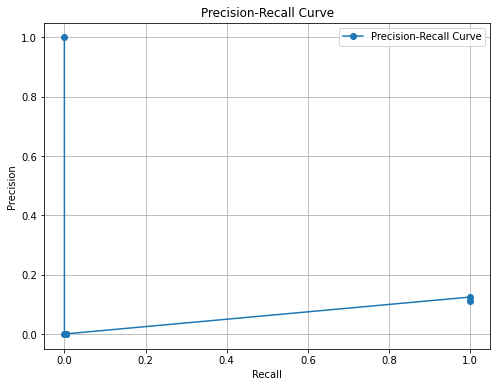

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', label='Precision-Recall Curve')
plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

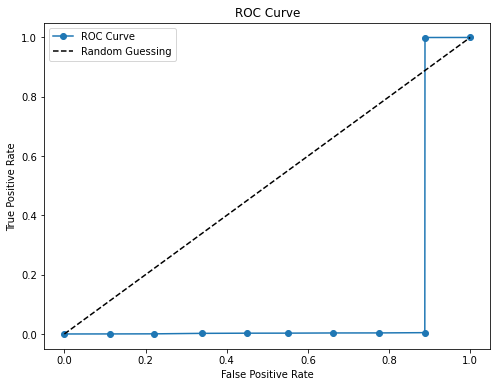

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_Labels, y_train_pred, pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

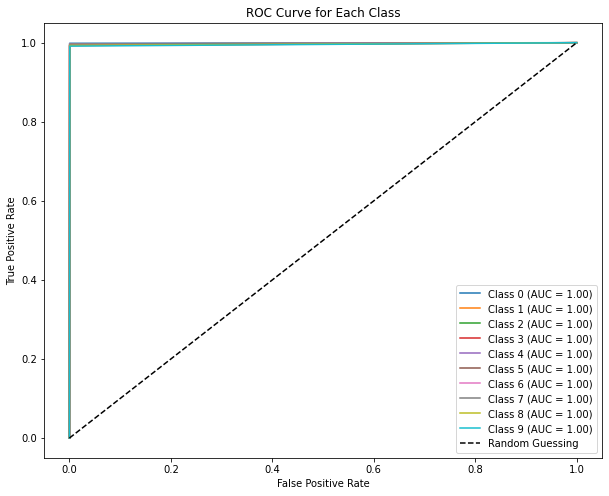

Multiclass ROC AUC score: 0.9973


In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# One-hot encode the labels for multiclass ROC AUC
train_Labels_bin = label_binarize(train_Labels, classes=np.arange(10))
y_train_pred_bin = label_binarize(y_train_pred, classes=np.arange(10))

#plotting roc curve for each class
from sklearn.metrics import roc_curve
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(train_Labels_bin[:, i], y_train_pred_bin[:, i])
    roc_auc[i] = roc_auc_score(train_Labels_bin[:, i], y_train_pred_bin[:, i])
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()

# Calculate ROC AUC score for multiclass
roc_auc = roc_auc_score(train_Labels_bin, y_train_pred_bin, average='macro', multi_class='ovo')
print(f"Multiclass ROC AUC score: {roc_auc:.4f}")

<Figure size 720x720 with 0 Axes>

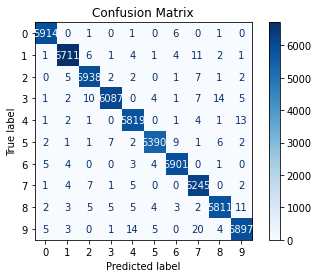

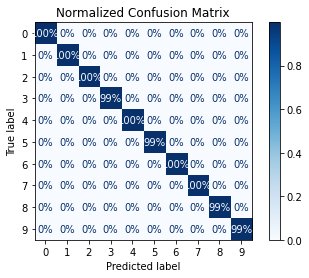

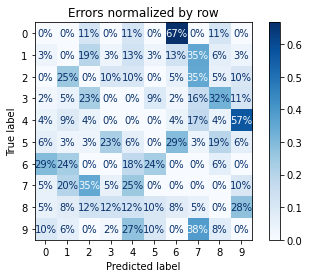

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(train_Labels, y_train_pred,
                                         display_labels=class_names, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
#normalized confusion matrix
ConfusionMatrixDisplay.from_predictions(train_Labels, y_train_pred,
                                         normalize='true',values_format=".0%" ,
                                         display_labels=class_names, cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix')
plt.show()

#Error normalized by row
sample_weight = (train_Labels != y_train_pred).astype(int)
ConfusionMatrixDisplay.from_predictions(train_Labels, y_train_pred, sample_weight=sample_weight,
                                        normalize='true', values_format=".0%",
                                         display_labels=class_names, cmap=plt.cm.Blues)
plt.title("Errors normalized by row")
plt.show()

313/313 [==============================] - 1s 2ms/step
Accuracy: 98.69%
Confusion Matrix:
[[ 975    1    1    1    0    1    1    0    0    0]
 [   0 1130    1    1    0    0    2    1    0    0]
 [   3    4 1015    0    1    0    1    6    2    0]
 [   0    0    2  999    0    4    0    4    1    0]
 [   1    0    0    0  977    0    0    0    0    4]
 [   1    0    0    3    0  885    1    0    2    0]
 [   6    2    1    0    4    1  942    0    2    0]
 [   0    0    5    1    0    0    0 1020    1    1]
 [   9    0    5    3    1    3    1    1  948    3]
 [   1    4    1    1   12    3    0    8    1  978]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.

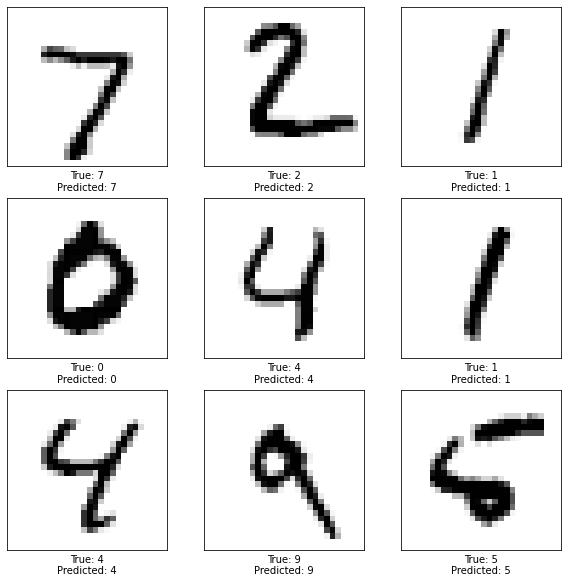

In [10]:
from sklearn.model_selection import cross_val_predict, cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Predicting the labels for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
# Calculating the accuracy
accuracy = accuracy_score(test_Labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Generating the confusion matrix
conf_matrix = confusion_matrix(test_Labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)
# Generating the classification report
class_report = classification_report(test_Labels, predicted_labels, target_names=class_names)
print('Classification Report:')
print(class_report)
# Visualizing some predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'True: {class_names[test_Labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}')
plt.show()


In [21]:
out = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [24]:
num = int(input("Please enter the number of the image you want to test: ")) #taking input from the user


m = -1000
o2 = out[num]
ind = -1

for i in range(len(o2)):
    if o2[i] > m:
        m = o2[i]
        ind = i
print("The predicted class is: ", class_names[ind]) #printing the predicted class
print("The real answer is : ", class_names[test_Labels[num]]) #printing the real answer

The predicted class is:  1
The real answer is :  1
